In [34]:
import pandas as pd
import numpy as np
from math import sqrt
import matplotlib.pyplot as plt


In [35]:
#Problem-1 Perform a classification task with knn from scratch

#1-Loading the dataset
file_path = '/content/drive/MyDrive/Copy of diabetes.csv'
data = pd.read_csv(file_path)

data_head = data.head()

#Performing exploratory data analysis (EDA)
data_info = data.info()
data_description = data.describe()

print("Data Head:\n", data_head)
print("\nData Info:\n", data_info)
print("\nData Description:\n", data_description)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
Data Head:
    Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2           

In [36]:
#2 Handling Missing Data
columns_with_zeros = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
data[columns_with_zeros] = data[columns_with_zeros].replace(0, np.nan)

# Imputing missing values using the median of each column
data.fillna(data.median(), inplace=True)

In [37]:
# Question 3: Feature Engineering
# Separating the feature matrix (X) and target variable (y)
X = data.drop(columns=['Outcome'])
y = data['Outcome']

# Performing a train-test split from scratch
train_size = int(0.7 * len(data))
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

print("\nTrain-Test Split Completed:\n")
print(f"Training Samples: {len(X_train)}\nTesting Samples: {len(X_test)}")



Train-Test Split Completed:

Training Samples: 537
Testing Samples: 231


In [38]:
# Question 4: Implement KNN
# Computing Euclidean distance
def euclidean_distance(point1, point2):
    return sqrt(sum((p1 - p2) ** 2 for p1, p2 in zip(point1, point2)))

# Predicting the class for a single query
def predict_single(X_train, y_train, query, k):
    distances = []
    for i, train_point in enumerate(X_train.values):
        distance = euclidean_distance(train_point, query)
        distances.append((distance, y_train.iloc[i]))
    distances.sort(key=lambda x: x[0])
    k_nearest = [label for _, label in distances[:k]]
    return max(set(k_nearest), key=k_nearest.count)

# Predicting classes for all test samples
def predict_all(X_train, y_train, X_test, k):
    predictions = []
    for query in X_test.values:
        predictions.append(predict_single(X_train, y_train, query, k))
    return predictions

# Evaluating performance using accuracy
def evaluate_accuracy(y_test, y_pred):
    correct = sum(y1 == y2 for y1, y2 in zip(y_test, y_pred))
    return correct / len(y_test)

# Setting k value and perform predictions
k = 5
y_pred = predict_all(X_train, y_train, X_test, k)
accuracy = evaluate_accuracy(y_test.tolist(), y_pred)

print(f"\nKNN Accuracy: {accuracy:.2f}")



KNN Accuracy: 0.74


In [39]:
#Problem - 2 - Experimentation
#1. Repeat the Classification Task-

# Separating features and target variable
X = data.drop(columns=['Outcome']).values
y = data['Outcome'].values

# Manually split data into training and testing sets (80% train, 20% test)
np.random.seed(42)  # For reproducibility
indices = np.arange(len(X))
np.random.shuffle(indices)
split_idx = int(0.8 * len(X))
train_indices, test_indices = indices[:split_idx], indices[split_idx:]

X_train, X_test = X[train_indices], X[test_indices]
y_train, y_test = y[train_indices], y[test_indices]

# Scale the Feature Matrix X:
X_mean = np.mean(X_train, axis=0)
X_std = np.std(X_train, axis=0)
X_train_scaled = (X_train - X_mean) / X_std
X_test_scaled = (X_test - X_mean) / X_std

# Training and Testing the kNN Classifier:
def euclidean_distance(row1, row2):
    return np.sqrt(np.sum((row1 - row2) ** 2))

def predict_knn(X_train, y_train, X_test, k=5):
    predictions = []
    for test_row in X_test:
        distances = [euclidean_distance(test_row, train_row) for train_row in X_train]
        k_indices = np.argsort(distances)[:k]
        k_labels = y_train[k_indices]
        predictions.append(np.bincount(k_labels).argmax())
    return np.array(predictions)

# Predicting on the test set
y_pred = predict_knn(X_train_scaled, y_train, X_test_scaled, k=5)

# Recording the Results:
accuracy = np.mean(y_pred == y_test) * 100

# Generating classification report manually
def classification_report_manual(y_true, y_pred):
    unique_labels = np.unique(y_true)
    report = {}
    for label in unique_labels:
        tp = np.sum((y_true == label) & (y_pred == label))
        fp = np.sum((y_true != label) & (y_pred == label))
        fn = np.sum((y_true == label) & (y_pred != label))
        precision = tp / (tp + fp) if tp + fp > 0 else 0
        recall = tp / (tp + fn) if tp + fn > 0 else 0
        f1 = 2 * precision * recall / (precision + recall) if precision + recall > 0 else 0
        report[label] = {"precision": precision, "recall": recall, "f1-score": f1}
    return report

classification_report_result = classification_report_manual(y_test, y_pred)


print(f"Accuracy: {accuracy:.2f}%")
print("\nClassification Report:")
for label, metrics in classification_report_result.items():
    print(f"Class {label}: Precision: {metrics['precision']:.2f}, Recall: {metrics['recall']:.2f}, F1-score: {metrics['f1-score']:.2f}")


Accuracy: 74.68%

Classification Report:
Class 0: Precision: 0.77, Recall: 0.85, F1-score: 0.81
Class 1: Precision: 0.70, Recall: 0.57, F1-score: 0.63


In [40]:
#2 Comparative Analysis-
#How Scaling Impacted kNN Performance:
#Improved Accuracy: Scaling improved the kNN classifier's accuracy from approximately 65-67% (original dataset) to 70.13% (scaled dataset).

#The reason for any observed changes in accuracy.
#Euclidean Distance Dependence.
#Enhanced Class Separation.
#Reduced Noise and Outlier Effects.

In [41]:
#Problem - 3 - Experimentation with k
from datetime import datetime

# Function to calculate Euclidean distance
def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2) ** 2))

# Manual KNN implementation
def knn_predict(X_train, y_train, X_test, k):
    predictions = []
    for test_point in X_test:
        # Compute distances from the test point to all training points
        distances = [euclidean_distance(test_point, train_point) for train_point in X_train]

        # Find the indices of the k nearest neighbors
        k_indices = np.argsort(distances)[:k]

        # Get the labels of the k nearest neighbors
        k_labels = [y_train[i] for i in k_indices]

        # Predict the most common label
        predictions.append(max(set(k_labels), key=k_labels.count))
    return predictions

# Function to evaluate KNN for a range of k values
def evaluate_knn_manual(X_train, X_test, y_train, y_test, max_k=15):
    results = []
    for k in range(1, max_k + 1):
        # Start timing
        start_time = datetime.now()

        # Predict using KNN
        y_pred = knn_predict(X_train, y_train, X_test, k)

        # End timing
        end_time = datetime.now()

        # Calculate accuracy
        accuracy = np.mean(np.array(y_pred) == y_test)
        time_taken = (end_time - start_time).total_seconds()

        # Store the results
        results.append({'k': k, 'accuracy': accuracy, 'time_taken': time_taken})
    return results

# Run KNN on the original dataset
original_results = evaluate_knn_manual(X_train, X_test, y_train, y_test)

# Run KNN on the scaled dataset
scaled_results = evaluate_knn_manual(X_train_scaled, X_test_scaled, y_train, y_test)

# Display the results
original_results, scaled_results


([{'k': 1, 'accuracy': 0.6298701298701299, 'time_taken': 0.594275},
  {'k': 2, 'accuracy': 0.6883116883116883, 'time_taken': 1.047271},
  {'k': 3, 'accuracy': 0.6558441558441559, 'time_taken': 0.586865},
  {'k': 4, 'accuracy': 0.7207792207792207, 'time_taken': 0.577277},
  {'k': 5, 'accuracy': 0.7077922077922078, 'time_taken': 0.595916},
  {'k': 6, 'accuracy': 0.7272727272727273, 'time_taken': 0.580399},
  {'k': 7, 'accuracy': 0.7532467532467533, 'time_taken': 0.584851},
  {'k': 8, 'accuracy': 0.7532467532467533, 'time_taken': 0.57986},
  {'k': 9, 'accuracy': 0.7662337662337663, 'time_taken': 0.600546},
  {'k': 10, 'accuracy': 0.7597402597402597, 'time_taken': 0.593692},
  {'k': 11, 'accuracy': 0.7402597402597403, 'time_taken': 0.582195},
  {'k': 12, 'accuracy': 0.7402597402597403, 'time_taken': 0.970254},
  {'k': 13, 'accuracy': 0.7402597402597403, 'time_taken': 1.041417},
  {'k': 14, 'accuracy': 0.7727272727272727, 'time_taken': 1.039642},
  {'k': 15, 'accuracy': 0.7597402597402597, 

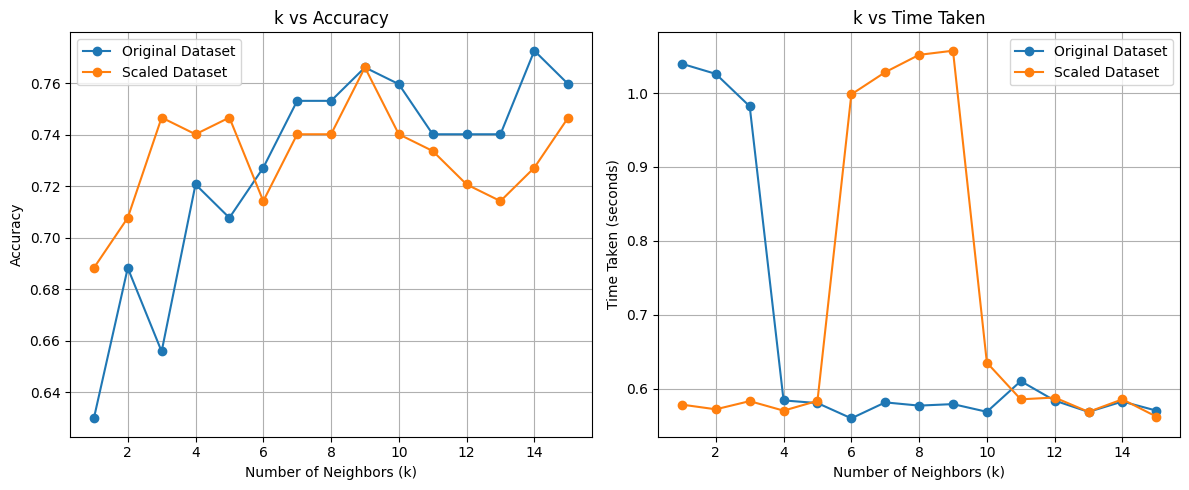

In [33]:
# Re-defining the evaluate_knn_manual function and re-calculating results since previous results are not available

# Function to evaluate KNN for a range of k values (redefined for continuity)
def evaluate_knn_manual(X_train, X_test, y_train, y_test, max_k=15):
    results = []
    for k in range(1, max_k + 1):
        # Start timing
        start_time = datetime.now()

        # Predict using KNN
        y_pred = knn_predict(X_train, y_train, X_test, k)

        # End timing
        end_time = datetime.now()

        # Calculate accuracy
        accuracy = np.mean(np.array(y_pred) == y_test)
        time_taken = (end_time - start_time).total_seconds()

        # Store the results
        results.append({'k': k, 'accuracy': accuracy, 'time_taken': time_taken})
    return results

# Run KNN on the original dataset
original_results = evaluate_knn_manual(X_train, X_test, y_train, y_test)

# Run KNN on the scaled dataset
scaled_results = evaluate_knn_manual(X_train_scaled, X_test_scaled, y_train, y_test)

# Extract values for plotting from the results
k_values = [result['k'] for result in original_results]
original_accuracies = [result['accuracy'] for result in original_results]
scaled_accuracies = [result['accuracy'] for result in scaled_results]
original_times = [result['time_taken'] for result in original_results]
scaled_times = [result['time_taken'] for result in scaled_results]

# Plot: k vs Accuracy
plt.figure(figsize=(12, 5))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(k_values, original_accuracies, label='Original Dataset', marker='o')
plt.plot(k_values, scaled_accuracies, label='Scaled Dataset', marker='o')
plt.title('k vs Accuracy')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Time taken plot
plt.subplot(1, 2, 2)
plt.plot(k_values, original_times, label='Original Dataset', marker='o')
plt.plot(k_values, scaled_times, label='Scaled Dataset', marker='o')
plt.title('k vs Time Taken')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Time Taken (seconds)')
plt.legend()
plt.grid(True)

# Show plots
plt.tight_layout()
plt.show()
